# Tutorial 1: Parametrizing our first molecule

Let's parametrize our first molecule with `auto_martiniM3`. 

We will focus on phenylmethanimine. Feeding only its SMILES string (`N=Cc1ccccc1`), `auto_martiniM3` will output a coarse-grained topology file (`.top`), and both atomistic and coarse-grained coordinate files (`.gro`). All files are compatible with the [GROMACS](https://www.gromacs.org) molecular dynamics software. We will also use `rdkit` to render the molecular structure, and where the CG beads map.

In [19]:
import auto_martiniM3 as am
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
print(rdkit.__version__)

2024.03.5


# Atomistic structure of the molecule

We first feed in the SMILES string of phenylmethanimine into the `rdkit` to render its 2-dimensional structure. This includes adding hydrogens to the molecule.

[11:04:25] Molecule does not have explicit Hs. Consider calling AddHs()


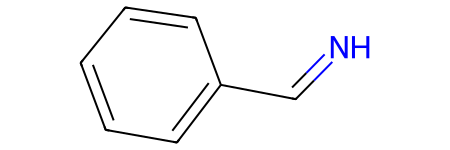

In [20]:
smiles = "N=Cc1ccccc1"
mol = Chem.MolFromSmiles(smiles)
Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
mol

`auto_martiniM3` has its own function to read in a SMILES string, create a *3-dimensional* conformer, and return an `rdkit` molecule object. We'll use that here:

In [21]:
mol_am, _ = am.topology.gen_molecule_smi(smiles)

We feed in the `rdkit` molecule object `mol_am` into the `auto_martiniM3` solver. This is reponsible to analyze the molecular structure, map it to coarse-grain beads, and determine both intra and intermolecular interactions. We'll call our molecule `PHM`. This should only take a couple seconds to run. 

(Expect the code to take much longer once you work with much larger molecules, due to the way it combinatorially tries out coarse-grained bead placements. The code currently does not run well beyond $\approx 20$ heavy (non-hydrogen) atoms.)

In [22]:
cg = am.solver.Cg_molecule(mol_am, smiles, "PHM",_,_,_,_,_,_)

Converged to solution in 1 iteration(s)


This is it! Now attributes of the object `cg` contain the coarse-grained force field. 

First the topology, where the following would typically be saved to a `.top` file for a GROMACS simulation. It displays 3 coarse-grained beads, two of which are identical and one is different (due to the terminal group). These three beads are covalently bonded by constraints, due to the aromatic ring.

In [23]:
print(cg.topout)

; GENERATED WITH Auto_Martini M3FF for PHM
; Developed by: Kiran Kanekal, Tristan Bereau, and Andrew Abi-Mansour
; updated to Martini 3 force field by Magdalena Szczuka
; supervised by Matthieu Chavent, Pierre Poulain and Paulo C. T. Souza 
; SMILES code : N=Cc1ccccc1


[moleculetype]
; molname       nrexcl
  PHM          1

[atoms]
; id      type   resnr residue atom    cgnr    charge  mass ;  smiles    ; atom_num
   1       TN6d    1   PHM     N01       1        0    36   ;   C=N      ; atoms: N0, C1, ; ALOGPS defined bead
   2       TC5     1   PHM     C01       2        0    36   ;   C=C      ; atoms: C2, C3,          
   3       TC5     1   PHM     C02       3        0    36   ;   C=C      ; atoms: C4, C5,          
   4       TC5     1   PHM     C03       4        0    36   ;   C=C      ; atoms: C6, C7,          


[bonds]
;  i   j     funct   length   force.c.
   1   2     1       0.27       25000.00
   2   3     1       0.26       25000.00
   2   4     1       0.30       25000.

That's not it. For an MD simulation, we will also need a coarse-grained coordinate file (`.gro`). Use the `output_cg` function, and make sure to use the same molecule name used in the topology file. The function `output_cg` also optionally allows you to directly save this to a text file, by specifying the file name in the option`cg_output`.

The `10.00000  10.00000  10.00000` at the bottom of the file are simple placeholders for the box size.

In [24]:
print(cg.output_cg())

PHM generated from auto_martiniM3
    4
    1PHM    N01    1   0.252  -0.050  -0.028
    1PHM    C01    2   0.004  -0.127   0.027
    1PHM    C02    3  -0.231  -0.023   0.040
    1PHM    C03    4  -0.024   0.168  -0.033
  10.00000  10.00000  10.00000



Same thing if you're interested in getting an *atomistic* coordinate file, also `.gro`:

In [25]:
print(cg.output_aa())

PHM generated from auto_martiniM3
    8
    1PHM    N      1   0.306  -0.014  -0.044
    1PHM    C      2   0.201  -0.082  -0.013
    1PHM    C      3   0.063  -0.031  -0.003
    1PHM    C      4  -0.037  -0.122   0.032
    1PHM    C      5  -0.170  -0.080   0.043
    1PHM    C      6  -0.202   0.054   0.019
    1PHM    C      7  -0.103   0.145  -0.016
    1PHM    C      8   0.030   0.103  -0.027
  10.00000  10.00000  10.00000



# Conclusions

That's it! Congratulations on completing this first tutorial. You have parametrized your first molecule with `auto_martiniM3`. In the second tutorial, we'll have a visual look at which atoms got mapped on which coarse-grained beads.